# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [ ]:
# Import warnings



In [1]:
# Import the libraries you will be using for analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.9.2
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [3]:
# Try loading one file

#df = pd.read_parquet('2023-1.parquet')
df=   pd.read_parquet(r'C:\Users\vhemadri\Documents\EDA\EDA CaseStudy\Starter Notebook - EDA NYC Taxi\trip_records\2023-1.parquet')
df.shape

(3041714, 19)

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

There are 30,41,714 roww.  No it is not feasible to handle such large data

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
#os.chdir('/content/Assignments/EDA/data_NYC_Taxi/trip_records')
os.chdir('/Users/vhemadri/Documents/EDA/EDA CaseStudy/Starter Notebook - EDA NYC Taxi/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()
print(file_list)

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)
        # Reading the current file
        df1 = pd.read_parquet(file_path)
        df1['date'] = df1['tpep_pickup_datetime'].dt.date
        df1['hour'] = df1['tpep_pickup_datetime'].dt.hour
        
        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date in df1['date'].unique():
            date_data = df1[df1['date'] == date]
            # Iterate through each hour of the selected date
            for hour in date_data['hour'].unique():
                hour_data = date_data[date_data['hour'] == hour]
                  # Sample 5% of the hourly data randomly;  taking 1% data
                sample = hour_data.sample(frac = 0.01, random_state = 42)  
                 # add data of this hour to the dataframe
                sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
               # Concatenate the sampled data of all the dates to a single dataframe
       
    except Exception as e:
        print(f"Error reading file {file_name}: {e}")
        log_error(e)
    df = pd.concat([df,sampled_data])
df.shape

['2023-1.parquet', '2023-10.parquet', '2023-11.parquet', '2023-12.parquet', '2023-2.parquet', '2023-3.parquet', '2023-4.parquet', '2023-5.parquet', '2023-6.parquet', '2023-7.parquet', '2023-8.parquet', '2023-9.parquet']


(379268, 22)

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [5]:
# Store the df in csv/parquet
df.to_parquet('FinalData.parquet')
df.to_csv('FinalData.csv')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [6]:
# Load the new data file
df=   pd.read_parquet(r'C:\Users\vhemadri\Documents\EDA\EDA CaseStudy\Starter Notebook - EDA NYC Taxi\trip_records\FinalData.parquet')


In [7]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
428             2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1113            2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
819             2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3192            2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
2995263         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
428               7.74         1.0                  N           138   
1113              1.24         1.0                  N           161   
819               1.44         1.0                  N           237   
3192              0.54         1.0                  N           143   
2995263          19.24         NaN               None            66   

         DOLocationID  payment_type  ...  mta_tax  tip_amount  tolls_amount  \
428               256             2  ...      0.5        0.00           0.0   
1113              237             1  ...      0.5        2.58           0.0   
819               141             2  ...      0.5        0.00           0.0   
3192              142             2  ...      0.5        0.00           0.0   
2995263           107             0  ...      0.5        5.93           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  \
428                        1.0         41.15                   0.0   
1113                       1.0         15.48                   2.5   
819                        1.0         16.40                   2.5   
3192                       1.0         11.50                   2.5   
2995263                    1.0         35.57                   NaN   

         airport_fee        date  hour Airport_fee  
428             1.25  2023-01-01     0         NaN  
1113            0.00  2023-01-01     0         NaN  
819             0.00  2023-01-01     0         NaN  
3192            0.00  2023-01-01     0         NaN  
2995263          NaN  2023-01-01     0         NaN  

[5 rows x 22 columns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 379268 entries, 428 to 2696706
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               379268 non-null  int64         
 1   tpep_pickup_datetime   379268 non-null  datetime64[us]
 2   tpep_dropoff_datetime  379268 non-null  datetime64[us]
 3   passenger_count        366326 non-null  float64       
 4   trip_distance          379268 non-null  float64       
 5   RatecodeID             366326 non-null  float64       
 6   store_and_fwd_flag     366326 non-null  object        
 7   PULocationID           379268 non-null  int64         
 8   DOLocationID           379268 non-null  int64         
 9   payment_type           379268 non-null  int64         
 10  fare_amount            379268 non-null  float64       
 11  extra                  379268 non-null  float64       
 12  mta_tax                379268 non-null  float6

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [8]:
# Fix the index and drop any columns that are not needed
df.reset_index(inplace = True)
df.isnull().sum()
df.head()

index  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0      428         2  2023-01-01 00:07:18   2023-01-01 00:23:15   
1     1113         2  2023-01-01 00:16:41   2023-01-01 00:21:46   
2      819         2  2023-01-01 00:14:03   2023-01-01 00:24:36   
3     3192         2  2023-01-01 00:24:30   2023-01-01 00:29:55   
4  2995263         2  2023-01-01 00:43:00   2023-01-01 01:01:00   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0              1.0           7.74         1.0                  N   
1              2.0           1.24         1.0                  N   
2              3.0           1.44         1.0                  N   
3              1.0           0.54         1.0                  N   
4              NaN          19.24         NaN               None   

   PULocationID  DOLocationID  ...  mta_tax  tip_amount  tolls_amount  \
0           138           256  ...      0.5        0.00           0.0   
1           161           237  ...      0.5        2.58           0.0   
2           237           141  ...      0.5        0.00           0.0   
3           143           142  ...      0.5        0.00           0.0   
4            66           107  ...      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         41.15                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         16.40                   2.5         0.00   
3                    1.0         11.50                   2.5         0.00   
4                    1.0         35.57                   NaN          NaN   

         date  hour  Airport_fee  
0  2023-01-01     0          NaN  
1  2023-01-01     0          NaN  
2  2023-01-01     0          NaN  
3  2023-01-01     0          NaN  
4  2023-01-01     0          NaN  

[5 rows x 23 columns]

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [9]:
# Combine the two airport fee columns
df['airport_fee'] = df['airport_fee'].fillna(0)
df['Airport_fee'] = df['Airport_fee'].fillna(0)
df['airport_fee'] = df['airport_fee'] + df['Airport_fee']
df = df.drop('Airport_fee', axis=1)
df.isnull().sum()

index                        0
VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          12942
trip_distance                0
RatecodeID               12942
store_and_fwd_flag       12942
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     12942
airport_fee                  0
date                         0
hour                         0
dtype: int64

**2.1.4** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [110]:
# check where values of fare amount are negative
df[df['fare_amount'] < 0]


Empty DataFrame
Columns: [index, VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee, date, hour]
Index: []

[0 rows x 22 columns]

Did you notice something different in the `RatecodeID` column for above records?
There are no Negative fare_amount in the current Sample.

In [111]:
# Analyse RatecodeID for the negative fare amounts



In [10]:
# Find which columns have negative values
numerical_columns = [c for c in df.columns if (df[c].dtype.name != 'datetime64[us]' and df[c].dtype.name != 'object') ]
df[df[numerical_columns] < 0].count()


index                     0
VendorID                  0
tpep_pickup_datetime      0
tpep_dropoff_datetime     0
passenger_count           0
trip_distance             0
RatecodeID                0
store_and_fwd_flag        0
PULocationID              0
DOLocationID              0
payment_type              0
fare_amount               0
extra                     1
mta_tax                  15
tip_amount                0
tolls_amount              0
improvement_surcharge    15
total_amount             15
congestion_surcharge     10
airport_fee               3
date                      0
hour                      0
dtype: int64

In [11]:
# fix these negative values
df[df[numerical_columns] < 0] = 0
df[df[numerical_columns] < 0].count()


index                    0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
date                     0
hour                     0
dtype: int64

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column

In [12]:
# Find the proportion of missing values in each column
df.isnull().sum()/len(df)

index                    0.000000
VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.034124
trip_distance            0.000000
RatecodeID               0.034124
store_and_fwd_flag       0.034124
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     0.034124
airport_fee              0.000000
date                     0.000000
hour                     0.000000
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [13]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
#df[df['passenger_count'].isnull()]
passenger_count_mean = df['passenger_count'].mean()
print(passenger_count_mean)
df['passenger_count'].fillna(int(passenger_count_mean))
df[df['passenger_count'].isnull()]

1.3671866042814325


index  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
4       2995263         2  2023-01-01 00:43:00   2023-01-01 01:01:00   
15      2995167         2  2023-01-01 00:41:50   2023-01-01 01:14:50   
42      2995165         2  2023-01-01 00:37:21   2023-01-01 00:54:18   
43      2995317         2  2023-01-01 00:44:03   2023-01-01 01:13:49   
46      2995090         2  2023-01-01 00:50:55   2023-01-01 01:19:06   
...         ...       ...                  ...                   ...   
379058  2844971         2  2023-09-30 19:45:46   2023-09-30 20:03:29   
379068  2845223         2  2023-09-30 19:06:52   2023-09-30 19:26:11   
379075  2845051         1  2023-09-30 19:40:22   2023-09-30 19:48:06   
379138  2845847         1  2023-09-30 21:50:20   2023-09-30 22:06:38   
379215  2846107         1  2023-09-30 22:53:15   2023-09-30 23:10:04   

        passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
4                   NaN          19.24         NaN               None   
15                  NaN          10.77         NaN               None   
42                  NaN           4.52         NaN               None   
43                  NaN           9.19         NaN               None   
46                  NaN           2.74         NaN               None   
...                 ...            ...         ...                ...   
379058              NaN           2.78         NaN               None   
379068              NaN           1.93         NaN               None   
379075              NaN           0.00         NaN               None   
379138              NaN           0.00         NaN               None   
379215              NaN           0.00         NaN               None   

        PULocationID  DOLocationID  ...  extra  mta_tax  tip_amount  \
4                 66           107  ...    0.0      0.5        5.93   
15               151           106  ...    0.0      0.5       11.19   
42               114           262  ...    0.0      0.5        0.00   
43               239           256  ...    0.0      0.5        2.20   
46                90            48  ...    0.0      0.5        3.37   
...              ...           ...  ...    ...      ...         ...   
379058           137           231  ...    0.0      0.5        6.27   
379068           239           230  ...    0.0      0.5        0.00   
379075           239           239  ...    0.0      0.5        0.00   
379138           249            87  ...    0.0      0.5        0.00   
379215            48           249  ...    0.0      0.5        0.00   

        tolls_amount  improvement_surcharge  total_amount  \
4               0.00                    1.0         35.57   
15              6.55                    1.0         67.12   
42              0.00                    1.0         29.38   
43              0.00                    1.0         46.20   
46              0.00                    1.0         25.85   
...              ...                    ...           ...   
379058          0.00                    1.0         37.60   
379068          0.00                    1.0         24.02   
379075          0.00                    1.0         11.69   
379138          0.00                    1.0         23.71   
379215          0.00                    1.0         25.88   

        congestion_surcharge  airport_fee        date  hour  
4                        NaN          0.0  2023-01-01     0  
15                       NaN          0.0  2023-01-01     0  
42                       NaN          0.0  2023-01-01     0  
43                       NaN          0.0  2023-01-01     0  
46                       NaN          0.0  2023-01-01     0  
...                      ...          ...         ...   ...  
379058                   NaN          0.0  2023-09-30    19  
379068                   NaN          0.0  2023-09-30    19  
379075                   NaN          0.0  2023-09-30    19  
379138                   NaN          0.0  2023-09-30    21  


Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [14]:
# Fix missing values in 'RatecodeID'
df[df['RatecodeID'].isnull()]
df = df[df['RatecodeID'].notnull()]
df.shape

(366326, 22)

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [15]:
# handle null values in congestion_surcharge
congestion_surcharge_mean = df['congestion_surcharge'].mean()
df['congestion_surcharge'].fillna(float(congestion_surcharge_mean))


0         0.0
1         2.5
2         2.5
3         2.5
5         2.5
         ... 
379263    2.5
379264    2.5
379265    2.5
379266    2.5
379267    2.5
Name: congestion_surcharge, Length: 366326, dtype: float64

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [16]:
# Handle any remaining missing values
df.isnull().sum()/len(df)
df = df[df['store_and_fwd_flag'].notnull()]
df.isnull().sum()/len(df)

index                    0.0
VendorID                 0.0
tpep_pickup_datetime     0.0
tpep_dropoff_datetime    0.0
passenger_count          0.0
trip_distance            0.0
RatecodeID               0.0
store_and_fwd_flag       0.0
PULocationID             0.0
DOLocationID             0.0
payment_type             0.0
fare_amount              0.0
extra                    0.0
mta_tax                  0.0
tip_amount               0.0
tolls_amount             0.0
improvement_surcharge    0.0
total_amount             0.0
congestion_surcharge     0.0
airport_fee              0.0
date                     0.0
hour                     0.0
dtype: float64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [119]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns



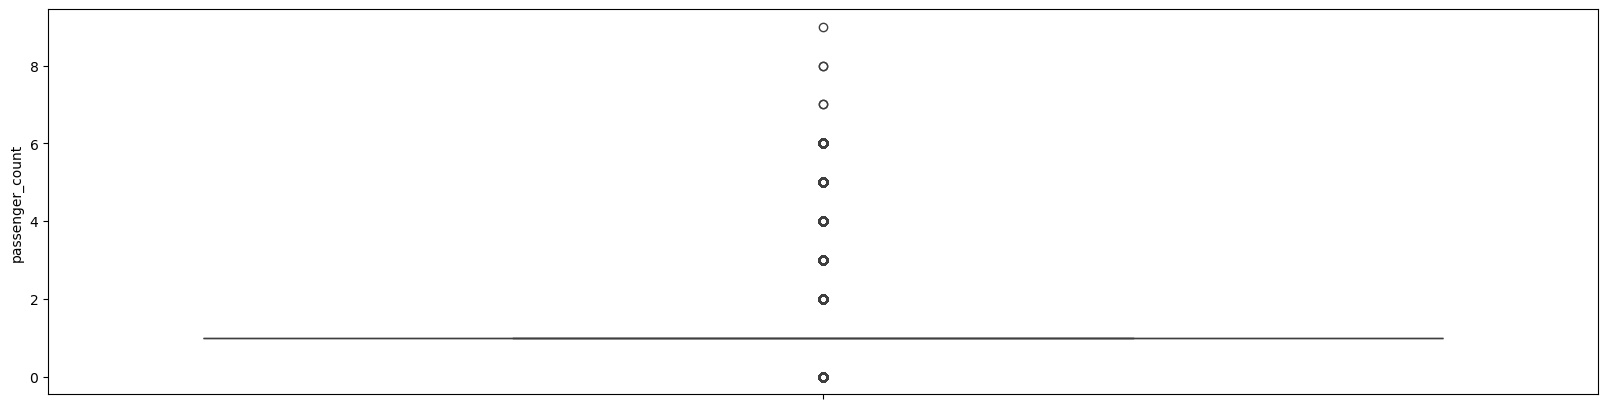

In [17]:
plt.figure(figsize = (20,5))
sns.boxplot(df.passenger_count)
plt.show()

In [18]:
plt.figure(figsize = (20,5))
sns.boxplot(df.trip_distance)
plt.show()


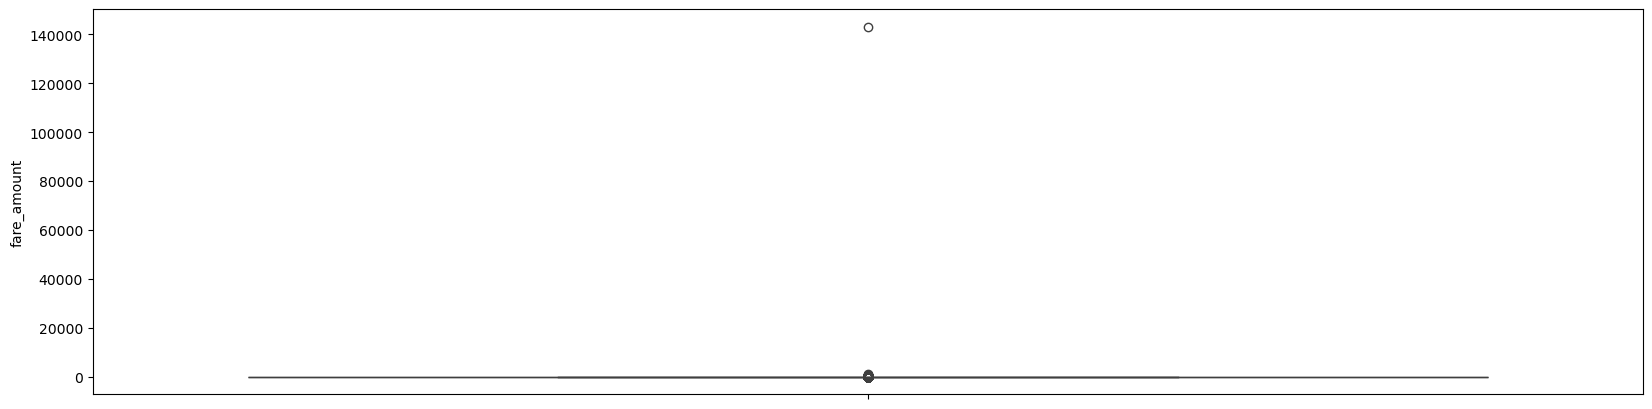

In [19]:
plt.figure(figsize = (20,5))
sns.boxplot(df.fare_amount)
plt.show()

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [20]:
# remove passenger_count > 6
df = df[df['passenger_count'] <= 6]
df[df['passenger_count'] > 6]

Empty DataFrame
Columns: [index, VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee, date, hour]
Index: []

[0 rows x 22 columns]

In [21]:
# Continue with outlier handling
# trip distance.
#Entries where trip_distance is more than 250 miles
df = df[df['trip_distance'] <= 250]
df[df['trip_distance'] > 250 ]

Empty DataFrame
Columns: [index, VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee, date, hour]
Index: []

[0 rows x 22 columns]

In [22]:
# Continue with outlier handling
# trip distance.
#Entries where trip_distance is nearly 0 and fare_amount is more than 300
df[((df['trip_distance'] < 1 ) & (df['fare_amount'] > 300) )]
df = df[~((df['trip_distance'] < 1 ) & (df['fare_amount'] > 300) )]
df[((df['trip_distance'] < 1 ) & (df['fare_amount'] > 300) )]


Empty DataFrame
Columns: [index, VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee, date, hour]
Index: []

[0 rows x 22 columns]

In [23]:
# Continue with outlier handling
# trip distance.

#Entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
df[((df['trip_distance'] == 0  ) & (df['fare_amount'] == 0 ) & (df['PULocationID'] != df['DOLocationID']))]
df =  df[~((df['trip_distance'] == 0  ) & (df['fare_amount'] == 0 ) & (df['PULocationID'] != df['DOLocationID']))]
df[((df['trip_distance'] == 0  ) & (df['fare_amount'] == 0 ) & (df['PULocationID'] != df['DOLocationID']))]

Empty DataFrame
Columns: [index, VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee, date, hour]
Index: []

[0 rows x 22 columns]

In [24]:
# Continue with outlier handling
#Entries where payment_type is 0 (there is no payment_type 0 defined in the data dictionary)
df[df['payment_type'] == 0 ]

Empty DataFrame
Columns: [index, VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee, date, hour]
Index: []

[0 rows x 22 columns]

In [ ]:
# Do any columns need standardising?

NO

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [25]:
df.columns.tolist()

['index',
 'VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'date',
 'hour']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

They are Numerical.

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [26]:
# Find and show the hourly trends in taxi pickups
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['pickup_hour'] = df.tpep_pickup_datetime.dt.hour

def clock(ax, radii, title, color):
    N = 24
    bottom = 2

    # create theta for 24 hours
    theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)


    # width of each bin on the plot
    width = (2*np.pi) / N
    
    bars = ax.bar(theta, radii, width=width, bottom=bottom, color=color, edgecolor="#999999")

    # set the lable go clockwise and start from the top
    ax.set_theta_zero_location("N")
    # clockwise
    ax.set_theta_direction(-1)

    # set the label
    ax.set_xticks(theta)
    ticks = ["{}:00".format(x) for x in range(24)]
    ax.set_xticklabels(ticks)
    ax.set_title(title)


plt.figure(figsize = (15,15))
ax = plt.subplot(2,2,1, polar=True)
    # make the histogram that bined on 24 hour
radii = np.array(df['pickup_hour'].value_counts(sort = False).tolist(), dtype="int64")
title = "Trips per Hour"
clock(ax, radii, title, "#dc143c")

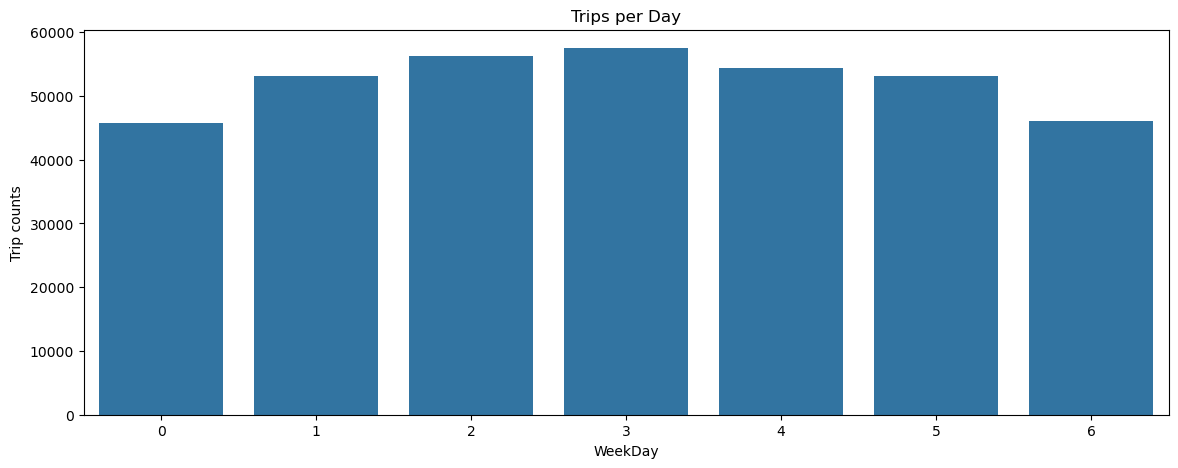

In [33]:
# Find and show the daily trends in taxi pickups (days of the week)
#df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

df['weekday_num'] = df["tpep_pickup_datetime"].dt.weekday
plt.figure(figsize = (14,5))
group9 = df.groupby('weekday_num').index.count()
sns.barplot(x=group9.index, y=group9.values)
plt.xlabel('WeekDay')
plt.ylabel('Trip counts')
plt.title('Trips per Day')
plt.show()



In [34]:
# Show the monthly trends in pickups
#df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

df['month'] = df.tpep_pickup_datetime.dt.month
plt.figure(figsize = (14,5))
group9 = df.groupby('month').index.count()
sns.barplot(x=group9.index, y=group9.values)
plt.xlabel('Month')
plt.ylabel('Trip counts')
plt.title('Trips per Month')
plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [27]:
# Analyse the above parameters
df[df['fare_amount'] <= 0].count()
df[df['tip_amount'] <= 0].count()
df[df['total_amount'] <= 0].count()
df[df['trip_distance'] <= 0].count()


index                    4512
VendorID                 4512
tpep_pickup_datetime     4512
tpep_dropoff_datetime    4512
passenger_count          4512
trip_distance            4512
RatecodeID               4512
store_and_fwd_flag       4512
PULocationID             4512
DOLocationID             4512
payment_type             4512
fare_amount              4512
extra                    4512
mta_tax                  4512
tip_amount               4512
tolls_amount             4512
improvement_surcharge    4512
total_amount             4512
congestion_surcharge     4512
airport_fee              4512
date                     4512
hour                     4512
pickup_hour              4512
dtype: int64

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [28]:
# Create a df with non zero entries for the selected parameters.

df = df[df['fare_amount'] > 0]
df = df[df['tip_amount'] > 0]
df = df[df['total_amount'] > 0]
df = df[df['trip_distance'] > 0]

df[df['fare_amount'] <= 0].count()
df[df['tip_amount'] <= 0].count()
df[df['total_amount'] <= 0].count()
df[df['trip_distance'] <= 0].count()

index                    0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
date                     0
hour                     0
pickup_hour              0
dtype: int64

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

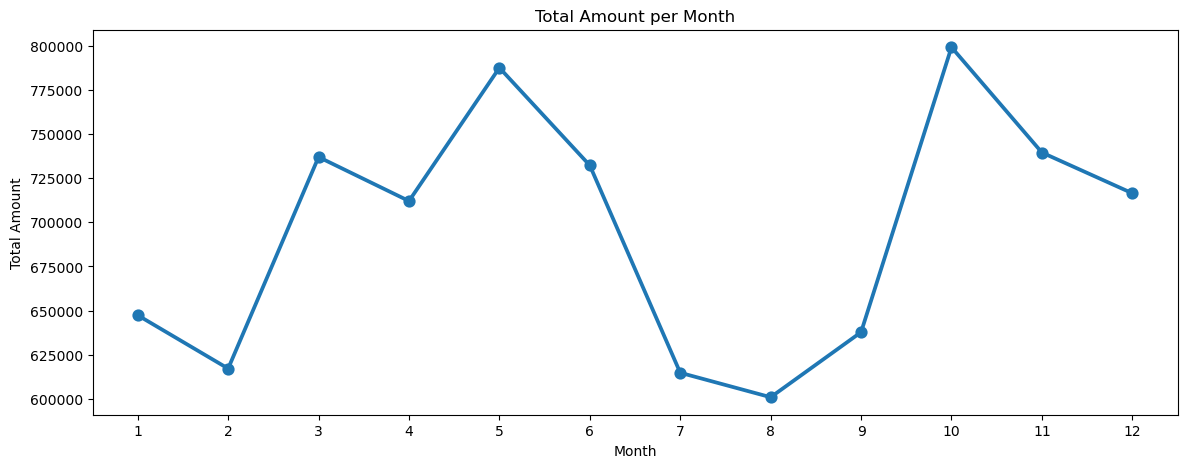

In [94]:
# Group data by month and analyse monthly revenue
plt.figure(figsize = (14,5))
group3 = df.groupby('month').total_amount.sum()
sns.pointplot(x=group3.index,y=group3.values)
plt.ylabel('Total Amount')
plt.xlabel('Month')
plt.title('Total Amount per Month')
plt.show()


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

<Axes: ylabel='total_amount'>

<Figure size 1400x500 with 0 Axes>

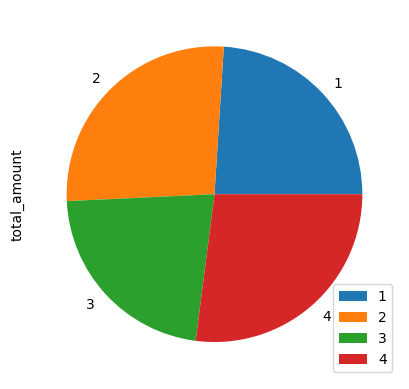

In [101]:
# Calculate proportion of each quarter
plt.figure(figsize = (14,5))
df['quarter'] = df.tpep_pickup_datetime.dt.quarter

df_pivot = pd.pivot_table(df, 
                         values="total_amount", 
                         index="quarter",                         
                         aggfunc="sum"
                        )

df_pivot.plot.pie(y='total_amount')


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

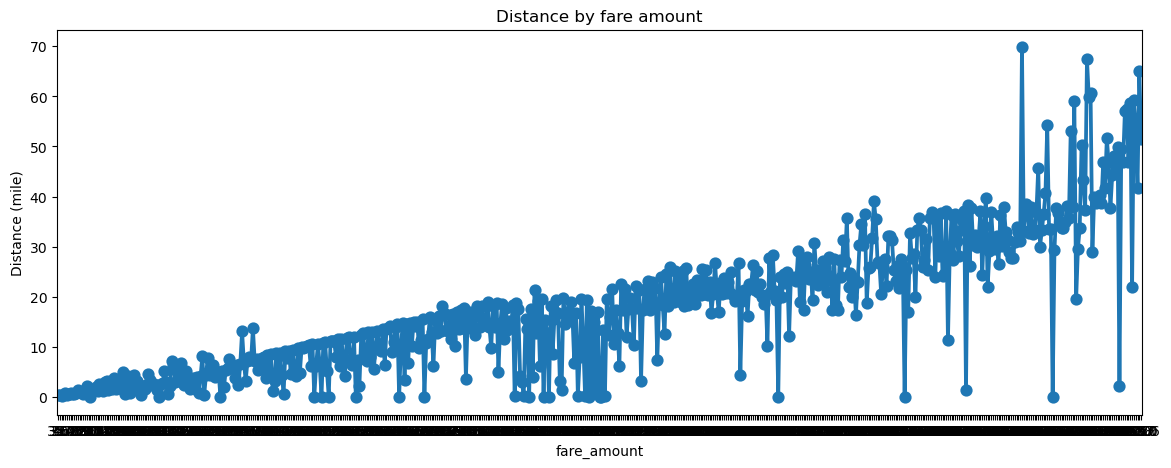

In [30]:
# Show how trip fare is affected by distance
plt.figure(figsize = (14,5))
group5 = df.groupby('fare_amount').trip_distance.mean()
sns.pointplot(x=group5.index, y= group5.values)
plt.ylabel('Distance (mile)')
plt.title('Distance by fare amount')
plt.show()


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [31]:
# Show relationship between fare and trip duration
plt.figure(figsize = (10,5))
df["trip_duration"] = (df["tpep_dropoff_datetime"]- df["tpep_pickup_datetime"] ) /pd.Timedelta(minutes=1)
plt.scatter(df.fare_amount,df.trip_duration, s=5, alpha=1)
plt.xlabel('fare_amount')
plt.ylabel('Trip Duration')
plt.title('Fare Amount v/s Trip Duration')
plt.show()


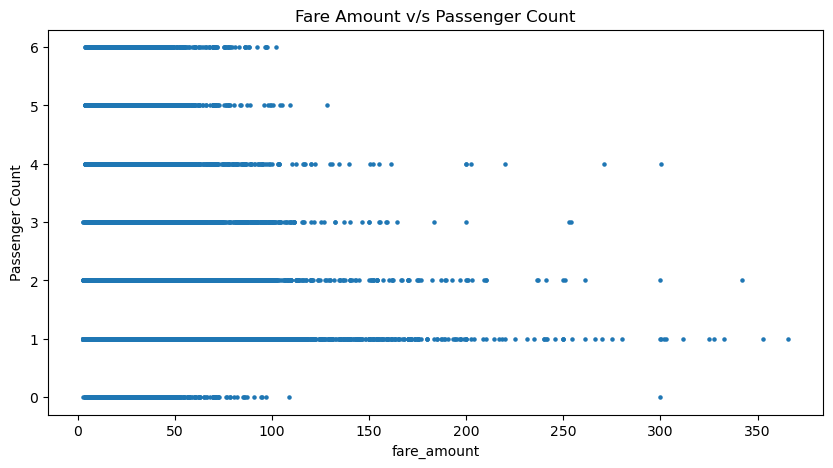

In [32]:
# Show relationship between fare and number of passengers

plt.figure(figsize = (10,5))
plt.scatter(df.fare_amount,df.passenger_count, s=5, alpha=1)
plt.xlabel('fare_amount')
plt.ylabel('Passenger Count')
plt.title('Fare Amount v/s Passenger Count')
plt.show()

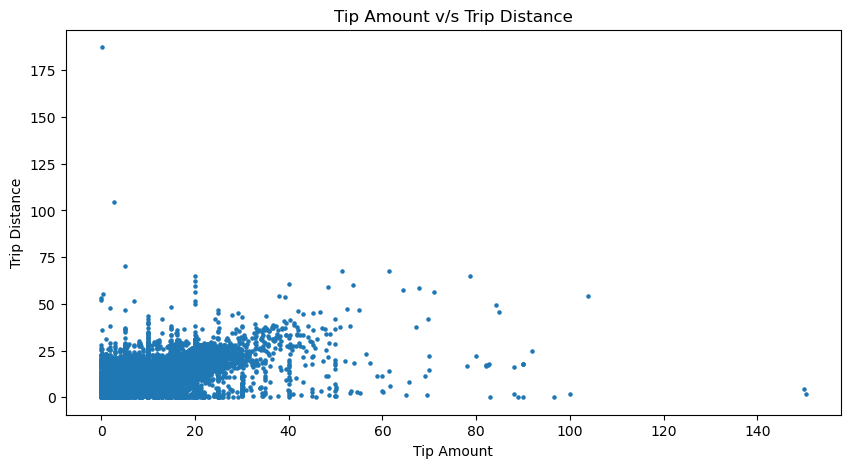

In [33]:
# Show relationship between tip and trip distance
plt.figure(figsize = (10,5))
plt.scatter(df.tip_amount,df.trip_distance, s=5, alpha=1)
plt.xlabel('Tip Amount')
plt.ylabel('Trip Distance')
plt.title('Tip Amount v/s Trip Distance')
plt.show()


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

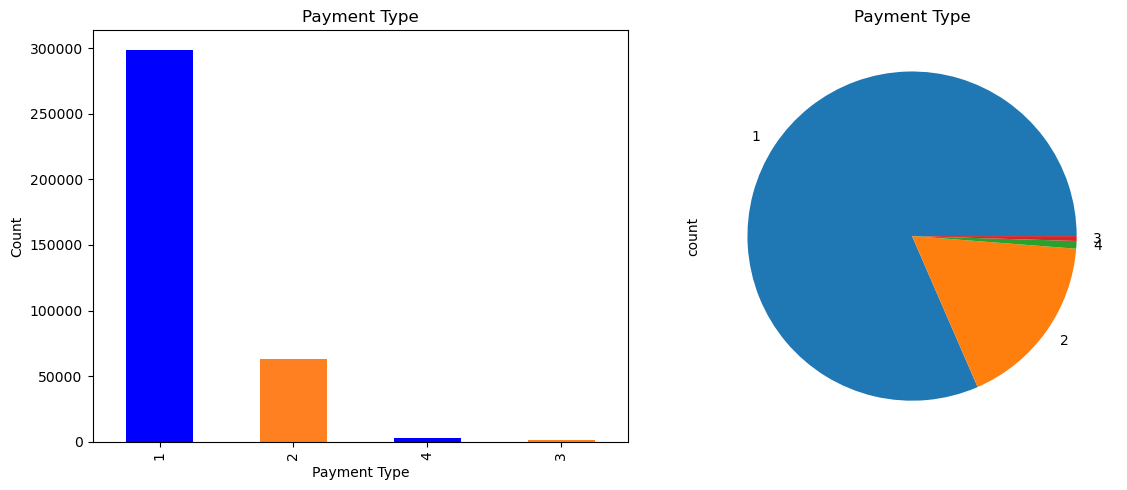

In [39]:
# Analyse the distribution of different payment types (payment_type).
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,5))
ax = df['payment_type'].value_counts().plot(kind='bar',title="Payment Type",ax=axes[0],color = ('blue',(1, 0.5, 0.13)))
df['payment_type'].value_counts().plot(kind='pie',title="Payment Type",ax=axes[1])
ax.set_ylabel("Count")
ax.set_xlabel("Payment Type")
fig.tight_layout()



- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [223]:
 !pip install geopandas

   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   -- ------------------------------------- 1.0/16.2 MB 5.6 MB/s eta 0:00:03
   ---- ----------------------------------- 1.8/16.2 MB 4.6 MB/s eta 0:00:04
   ----- ---------------------------------- 2.4/16.2 MB 3.5 MB/s eta 0:00:04
   -------- ------------------------------- 3.4/16.2 MB 4.1 MB/s eta 0:00:04
   ---------- ----------------------------- 4.2/16.2 MB 4.1 MB/s eta 0:00:03
   ------------ --------------------------- 5.0/16.2 MB 4.0 MB/s eta 0:00:03
   -------------- ------------------------- 5.8/16.2 MB 3.8 MB/s eta 0:00:03
   ---------------- ----------------------- 6.8/16.2 MB 4.0 MB/s eta 0:00:03
   ------------------ --------------------- 7.6/16.2 MB 3.9 MB/s eta 0:00:03
   -------------------- ------------------- 8.4/16.2 MB 3.9 MB/s eta 0:00:02
   ---------------------- ----------------- 9.2/16.2 MB 3.9 MB/s eta 0:00:02
   ------------------------ --------------- 10.0/16.2 MB 3.9 MB/s eta 0:00:02
   --

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [40]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file(r'C:\Users\vhemadri\Documents\EDA\EDA CaseStudy\Starter Notebook - EDA NYC Taxi\taxi_zones\taxi_zones.shp') # read the .shp file using gpd
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

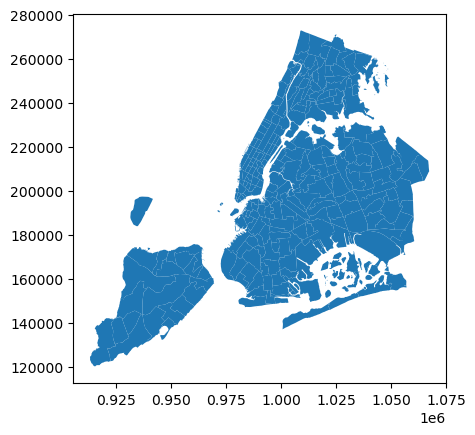

In [41]:
 print(zones.info())
 zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [42]:
# Merge zones and trip records using locationID and PULocationID
merged_df = pd.merge(df,zones, how='left',left_on=['PULocationID'],right_on=['LocationID']).dropna()
merged_df2 = pd.merge(merged_df,zones, how='left',left_on=['DOLocationID'],right_on=['LocationID']).dropna()
merged_df2.rename(columns={'zone_x': 'pickup_zone', 'zone_y': 'drop_zone'}, inplace=True)
merged_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 360408 entries, 0 to 362760
Data columns (total 39 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   index                  360408 non-null  int64         
 1   VendorID               360408 non-null  int64         
 2   tpep_pickup_datetime   360408 non-null  datetime64[us]
 3   tpep_dropoff_datetime  360408 non-null  datetime64[us]
 4   passenger_count        360408 non-null  float64       
 5   trip_distance          360408 non-null  float64       
 6   RatecodeID             360408 non-null  float64       
 7   store_and_fwd_flag     360408 non-null  object        
 8   PULocationID           360408 non-null  int64         
 9   DOLocationID           360408 non-null  int64         
 10  payment_type           360408 non-null  int64         
 11  fare_amount            360408 non-null  float64       
 12  extra                  360408 non-null  float64  

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [43]:
# Group data by location and calculate the number of trips
trips_df =merged_df2.groupby('LocationID_x').index.count()
trips_df

LocationID_x
1.0        49
3.0        12
4.0       358
5.0         3
6.0         4
         ... 
259.0       9
260.0      73
261.0    1882
262.0    4619
263.0    6930
Name: index, Length: 241, dtype: int64

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [44]:
# Merge trip counts back to the zones GeoDataFrame
merged_zones = pd.merge(zones,trips_df, how='left',left_on=['LocationID'],right_on=['LocationID_x']).dropna()
merged_zones["Trips"] = merged_zones["index"]
merged_zones.head()


OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   
5         6    0.150491    0.000606  Arrochar/Fort Wadsworth           6   

         borough                                           geometry  index  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   49.0   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   12.0   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  358.0   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...    3.0   
5  Staten Island  POLYGON ((966568.747 158679.855, 966615.256 15...    4.0   

   Trips  
0   49.0  
2   12.0  
3  358.0  
4    3.0  
5    4.0

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

In [45]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (12, 10))

# Plot the map and display it
merged_zones.plot(column = 'Trips',
ax = ax,
legend = True,
legend_kwds = {'label': "Trips", 'orientation': "horizontal"})



<Axes: >

In [46]:
# can you try displaying the zones DF sorted by the number of trips?
merged_zones.sort_values('Trips', ascending=False)


OBJECTID  Shape_Leng  Shape_Area                      zone  LocationID  \
131       132    0.245479    0.002038               JFK Airport         132   
236       237    0.042213    0.000096     Upper East Side South         237   
160       161    0.035804    0.000072            Midtown Center         161   
235       236    0.044252    0.000103     Upper East Side North         236   
161       162    0.035270    0.000048              Midtown East         162   
..        ...         ...         ...                       ...         ...   
220       221    0.166218    0.000890                 Stapleton         221   
213       214    0.135300    0.000812  South Beach/Dongan Hills         214   
203       204    0.101912    0.000641         Rossville/Woodrow         204   
182       183    0.039826    0.000095                Pelham Bay         183   
186       187    0.126868    0.000421             Port Richmond         187   

           borough                                           geometry  \
131         Queens  MULTIPOLYGON (((1032791.001 181085.006, 103283...   
236      Manhattan  POLYGON ((993633.442 216961.016, 993507.232 21...   
160      Manhattan  POLYGON ((991081.026 214453.698, 990952.644 21...   
235      Manhattan  POLYGON ((995940.048 221122.92, 995812.322 220...   
161      Manhattan  POLYGON ((992224.354 214415.293, 992096.999 21...   
..             ...                                                ...   
220  Staten Island  POLYGON ((963349.728 171627.581, 963397.759 17...   
213  Staten Island  POLYGON ((960669.201 156319.132, 960902.551 15...   
203  Staten Island  POLYGON ((927766.539 141772.465, 927864.475 14...   
182          Bronx  POLYGON ((1029414.164 246587.728, 1029380.19 2...   
186  Staten Island  MULTIPOLYGON (((946964.115 173161.64, 946977.8...   

       index    Trips  
131  18571.0  18571.0  
236  17316.0  17316.0  
160  17088.0  17088.0  
235  15472.0  15472.0  
161  13190.0  13190.0  
..       ...      ...  
220      1.0      1.0  
213      1.0      1.0  
203      1.0      1.0  
182      1.0      1.0  
186      1.0      1.0  

[242 rows x 9 columns]

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [47]:
# Find routes which have the slowest speeds at different times of the day
merged_df2['speed'] = (merged_df2.trip_distance/((merged_df2["tpep_dropoff_datetime"] - merged_df2["tpep_pickup_datetime"])/np.timedelta64(1, 'h')))
plt.figure(figsize = (14,5))
group9 = merged_df2.groupby('pickup_hour').speed.mean()
sns.pointplot(x= group9.index, y=group9.values)
plt.xlabel('Pick Up Hours')
plt.ylabel('Speed mile/h')
plt.title('Average Speed per Hour')
plt.show()


How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

Numer of trips are high at 18 hours

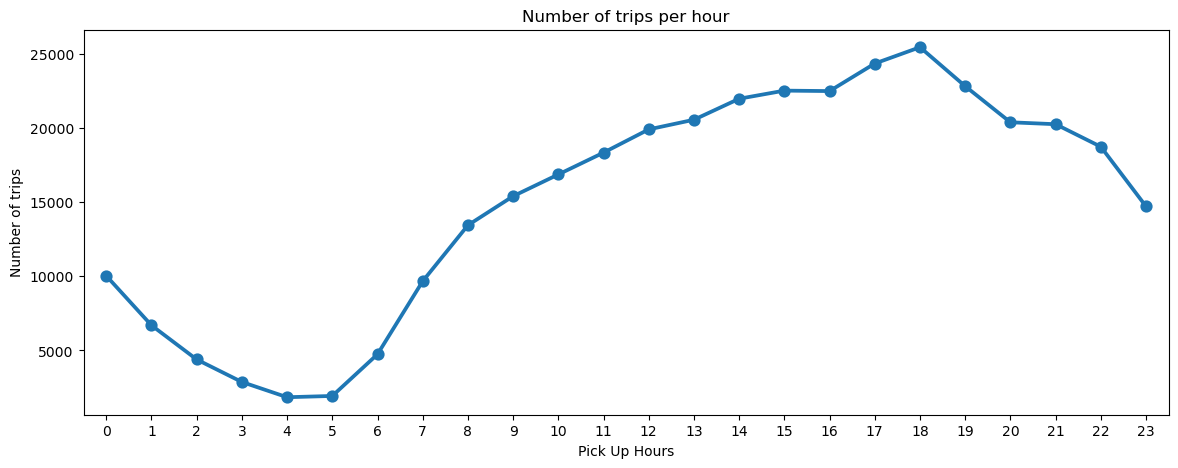

In [48]:
# Visualise the number of trips per hour and find the busiest hour
plt.figure(figsize = (14,5))
group9 = merged_df2.groupby('pickup_hour').index.count()
sns.pointplot(x=group9.index, y=group9.values)
plt.xlabel('Pick Up Hours')
plt.ylabel('Number of trips')
plt.title('Number of trips per hour')
plt.show()


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [ ]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction =



**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

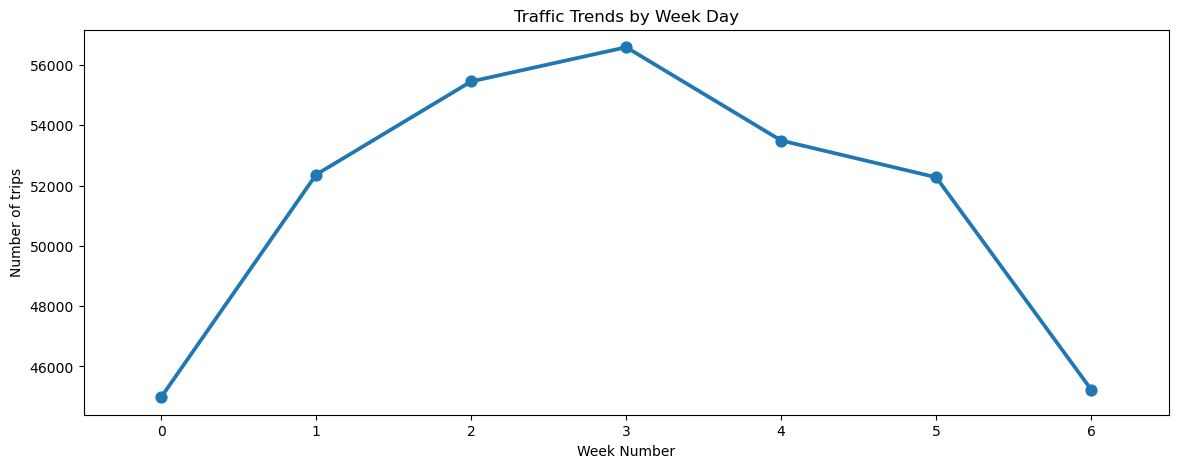

In [49]:
# Compare traffic trends for the week days and weekends
plt.figure(figsize = (14,5))
group9 = merged_df2.groupby('weekday_num').index.count()
sns.pointplot(x=group9.index, y=group9.values)
plt.xlabel('Week Number')
plt.ylabel('Number of trips')
plt.title('Traffic Trends by Week Day')
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?
Weekends  are less busy when compared to week days.

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [50]:
# Find top 10 pickup and dropoff zones
merged_df2.groupby('pickup_zone').index.count().nlargest(n=10)


pickup_zone
JFK Airport                     18571
Upper East Side South           17316
Midtown Center                  17088
Upper East Side North           15472
Midtown East                    13190
Penn Station/Madison Sq West    12595
LaGuardia Airport               12492
Times Sq/Theatre District       12091
Lincoln Square East             12044
Murray Hill                     10814
Name: index, dtype: int64

In [51]:
# Find top 10 pickup and dropoff zones
merged_df2.groupby('drop_zone').index.count().nlargest(n=10)

drop_zone
Upper East Side North        16297
Upper East Side South        15508
Midtown Center               14294
Times Sq/Theatre District    11130
Murray Hill                  10894
Midtown East                 10428
Lincoln Square East          10355
Upper West Side South        10156
Lenox Hill West               9590
East Chelsea                  9314
Name: index, dtype: int64

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [ ]:
# Find the top 10 and bottom 10 pickup/dropoff ratios



**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [52]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

merged_df2['daytime'] = merged_df2['tpep_pickup_datetime'].dt.hour.between(6,22, inclusive='both')
merged_df2['nighttime'] =~(merged_df2['tpep_pickup_datetime'].dt.hour.between(6,22, inclusive='both'))

In [53]:

# Top 10 pcikup Zones in the night hours
merged_df2[(merged_df2.nighttime)].groupby('pickup_zone').index.count().nlargest(n=10)


pickup_zone
East Village                    3072
JFK Airport                     2777
West Village                    2528
Clinton East                    2035
Lower East Side                 1929
Times Sq/Theatre District       1712
Greenwich Village South         1683
Penn Station/Madison Sq West    1377
LaGuardia Airport               1228
Midtown South                   1211
Name: index, dtype: int64

In [54]:
# Top 10 dropoff Zones in the night hours
merged_df2[(merged_df2.nighttime)].groupby('drop_zone').index.count().nlargest(n=10)


drop_zone
East Village                     1705
Clinton East                     1430
Murray Hill                      1293
Gramercy                         1180
East Chelsea                     1161
Lenox Hill West                  1069
Yorkville West                   1017
West Village                      925
Sutton Place/Turtle Bay North     893
Lower East Side                   884
Name: index, dtype: int64

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

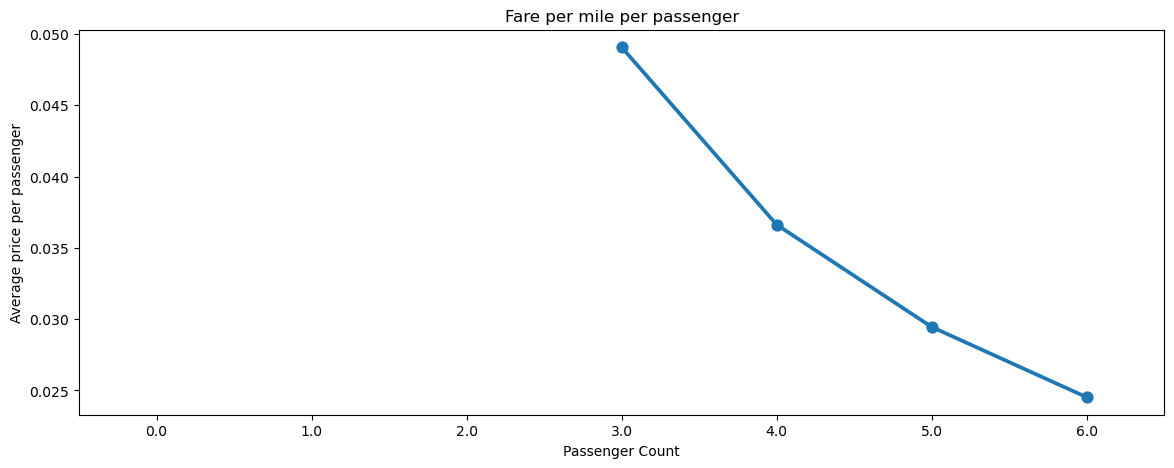

In [55]:
# Analyse the fare per mile per passenger for different passenger counts
merged_df2['fare_per-mile'] = merged_df2['trip_distance'] / merged_df2['fare_amount']
merged_df2.rename(columns={'fare_per-mile': 'fare_per_mile'}, inplace=True)
merged_df2['fare_per_mile_passenger'] = merged_df2['fare_per_mile'] / merged_df2['passenger_count']
plt.figure(figsize = (14,5))
group9 = merged_df2.groupby('passenger_count').fare_per_mile_passenger.mean()
sns.pointplot(x=group9.index, y=group9.values)
plt.xlabel('Passenger Count')
plt.ylabel('Average price per passenger')
plt.title('Fare per mile per passenger')
plt.show()


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

<Axes: xlabel='hour'>

<Figure size 1400x500 with 0 Axes>

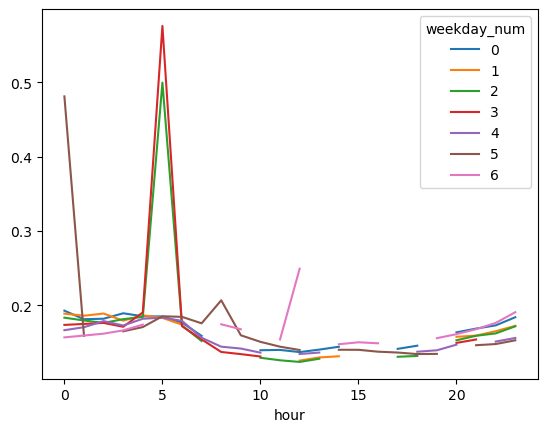

In [56]:
# Compare the average fare per mile for different days and for different times of the day
plt.figure(figsize = (14,5))

merged_df2['weekday_num'] = merged_df2["tpep_pickup_datetime"].dt.weekday
#print(merged_df2["weekday_num"])
merged_df2_pivot = pd.pivot_table(merged_df2, 
                         values="fare_per_mile", 
                         index="hour", 
                         columns="weekday_num", 
                       aggfunc="mean")

merged_df2_pivot.plot.line()


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

<Axes: xlabel='hour'>

<Figure size 1400x500 with 0 Axes>

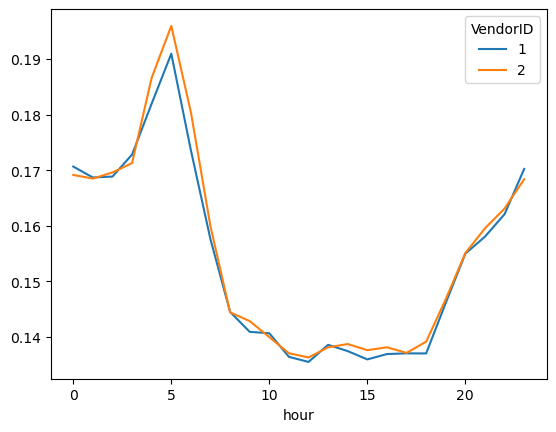

In [76]:
# Compare fare per mile for different vendors
plt.figure(figsize = (14,5))

merged_df2_pivot = pd.pivot_table(merged_df2, 
                          values="fare_per_mile", 
                          index="hour", 
                          columns="VendorID", 
                          aggfunc="mean")

merged_df2_pivot.plot.line()


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [ ]:
# Defining distance tiers



##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

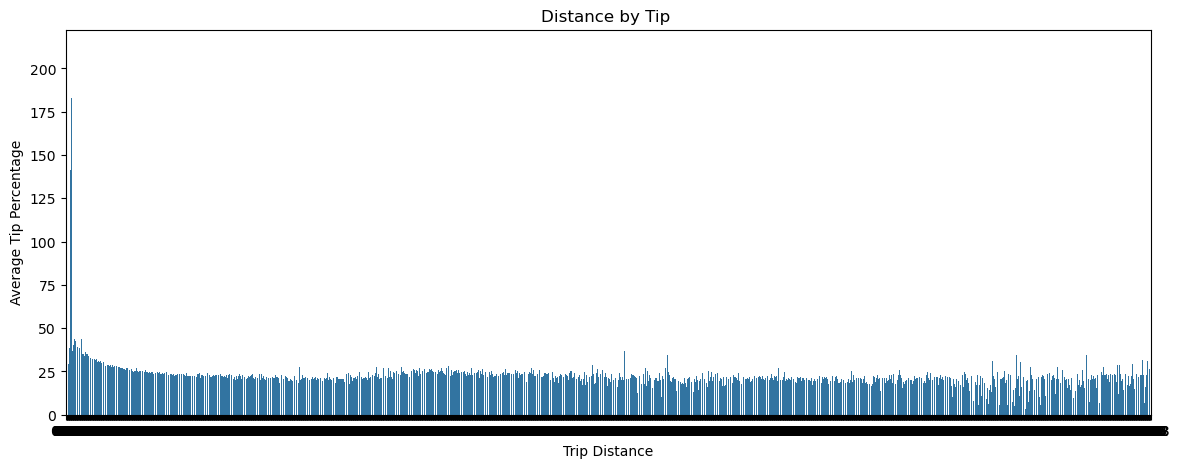

In [91]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
merged_df2['tip_percentage'] = merged_df2['tip_amount'] / merged_df2['fare_amount'] * 100
plt.figure(figsize = (14,5))
group9 = merged_df2.groupby('trip_distance').tip_percentage.mean()
sns.barplot(x=group9.index, y=group9.values)
plt.xlabel('Trip Distance')
plt.ylabel('Average Tip Percentage')
plt.title('Distance by Tip ')
plt.show()


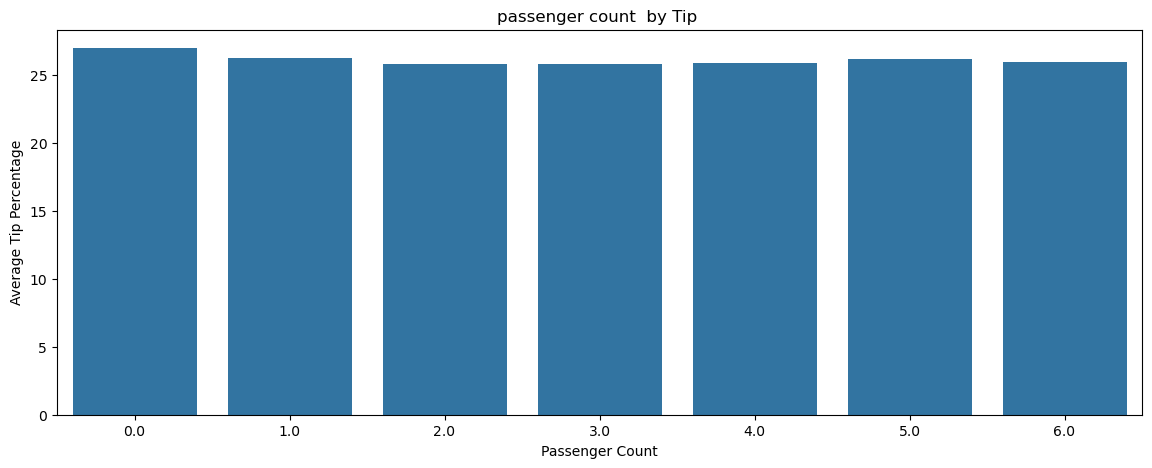

In [92]:
#merged_df2['tip_percentage'] = merged_df2['tip_amount'] / merged_df2['fare_amount'] * 100
plt.figure(figsize = (14,5))
group9 = merged_df2.groupby('passenger_count').tip_percentage.mean()
sns.barplot(x=group9.index, y=group9.values)
plt.xlabel('Passenger Count')
plt.ylabel('Average Tip Percentage')
plt.title('passenger count  by Tip ')
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [88]:
# See how passenger count varies across hours and days





**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [ ]:
# How does passenger count vary across zones



In [ ]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.



Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [ ]:
# How often is each surcharge applied?



## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [ ]:
	Deploy more cabs to high-demand zones during peak hours, such as JFK Airport, Upper East Side, and Midtown, particularly around 5 AM.
	Monitor traffic patterns to adjust routing strategies, focusing on reducing bottlenecks and improving efficiency on slow routes


**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [ ]:
More cabs around 5 am should be there at below zones.

Upper East Side South           14044
Midtown Center                  13389
Upper East Side North           12748
JFK Airport                     12387
Midtown East                    10630
LaGuardia Airport               10057
Lincoln Square East              9684
Penn Station/Madison Sq West     9638
Times Sq/Theatre District        8785
Murray Hill                      8594

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [ ]:
•	Consider increasing fare prices during high-demand hours between 10 AM and 3 PM to maximize revenue.
•	Implement tiered pricing based on trip distances, with different rates for short, medium, and long trips.
